# Bikeshare Forecast


In [1]:
from datascience import *
import datetime
import warnings

import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

##  Bike rentals data for 2011

In [2]:
bikeData = Table.read_table('data/bikeshare_2011.csv')

### The data table contain the following variables:

- index: record index, from the beginning of the year (1 to 8760)
- date: date
- season: season (winter, spring, summer, fall)
- year: year (0: 2011, 1: 2012)
- month : month (1 to 12)
- hour : hour (0 to 23)
- holiday: if a day is a holiday or not (if a holiday falls on a regular weekend, it is still 0)
- weekday: day of the week (0 - Sunday  to  6 - Saturday)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weather : general conditions 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : normalized temperature, from values in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 
- feels_like: normalized chill-factor adjusted temperature, from original values in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50
- hum: normalized humidity. The values are divided to 100 (max).
- windspeed: normalized wind speed. The values are divided to 67 (max).


### Finally, the dependent variables:

- casual: count of casual users
- registered: count of registered users

- count: total count of bikes rented, casual + registered

In [3]:
bikeData

index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feels_like,hum,windspeed,casual,registered,count
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8
10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0,8,6,14


### Day of the month

The day of the month is not in the original data table. It can be a useful variable to process and plot the data, so we will add it to the table.

In [4]:
def get_day(s): 
    return datetime.datetime.strptime(s, "%Y-%m-%d").day

bikeData['day'] = bikeData.apply(lambda date: get_day(date), ['date'])

### Looking at one day of data

Let us see how the number of rentals varies during a day.

In [5]:
# this funstion takes a subset of data: a given day in a given month
def get_one_day_of_bike_counts(month=1, day=1, plot=False): 
    
    bD = bikeData.where(bikeData['month']==month)  # filter data by month
    bDD = bD.where(bD['day']==day) # filter by day of the month
    
    if plot: # optionally, plot a graph
        bDD.select(['hour','count']).plot('hour')
    
    return bDD

index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feels_like,hum,windspeed,casual,registered,count,day
7129,2011-10-25,4,0,10,0,0,2,1,1,0.44,0.4394,0.77,0.1343,4,26,30,25
7130,2011-10-25,4,0,10,1,0,2,1,1,0.44,0.4394,0.77,0.1343,5,6,11,25
7131,2011-10-25,4,0,10,2,0,2,1,1,0.42,0.4242,0.82,0.1343,2,3,5,25
7132,2011-10-25,4,0,10,3,0,2,1,1,0.4,0.4091,0.87,0,1,3,4,25
7133,2011-10-25,4,0,10,4,0,2,1,1,0.38,0.3939,0.87,0.1343,0,5,5,25
7134,2011-10-25,4,0,10,5,0,2,1,1,0.38,0.3939,0.87,0.1343,0,24,24,25
7135,2011-10-25,4,0,10,6,0,2,1,1,0.38,0.3939,0.82,0.1045,3,95,98,25
7136,2011-10-25,4,0,10,7,0,2,1,1,0.4,0.4091,0.76,0.194,15,299,314,25
7137,2011-10-25,4,0,10,8,0,2,1,1,0.44,0.4394,0.72,0,25,383,408,25
7138,2011-10-25,4,0,10,9,0,2,1,1,0.48,0.4697,0.55,0.2239,29,194,223,25


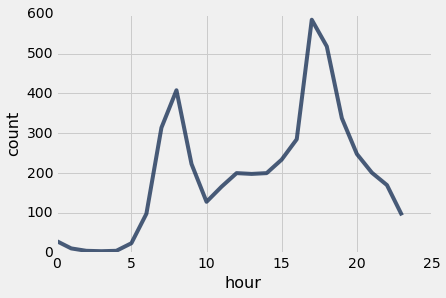

In [6]:
get_one_day_of_bike_counts(month=10, day = 25, plot=True)

### Registered vs Casual

Patterns of bike usage can vary a lot for registered (i.e. regular users who got bikeshare subscription) and casual (leisure riders and tourists using the system only occasionally). Let us visualise the counts for both groups within one week.

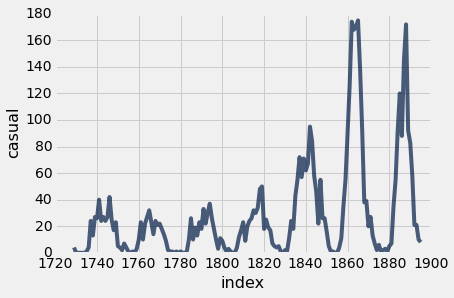

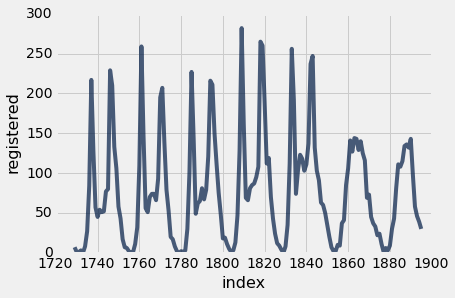

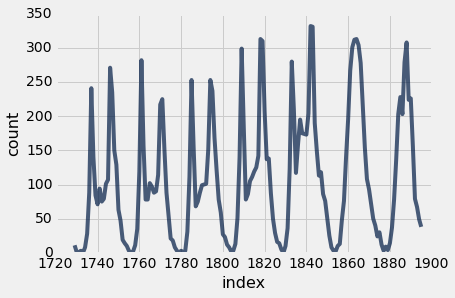

In [7]:
nday = 72 # day from the start of the year, nday=72 falls on Monday

# take a subset of data that is 7 days long, starting from nday
bikeShort = bikeData.where( bikeData['index'] > 24*(nday) ) 
bikeShort = bikeShort.where( bikeShort['index'] < 24*(nday + 7) )

bikeShort.select(['index','casual']).plot('index')
bikeShort.select(['index','registered']).plot('index')
bikeShort.select(['index','count']).plot('index')